In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data/microclimate_summary.csv')

# Get unique crop types (excluding grass)
crops = [c for c in df['crop'].unique() if c != 'grass']

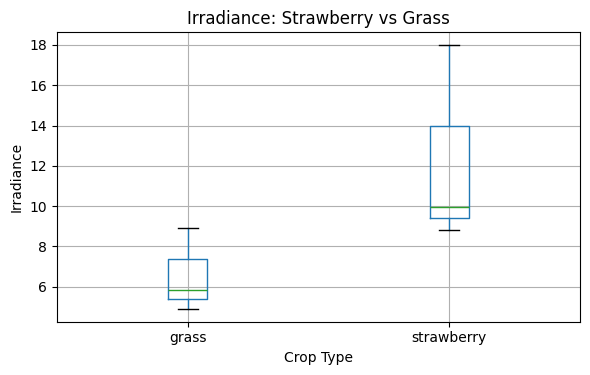

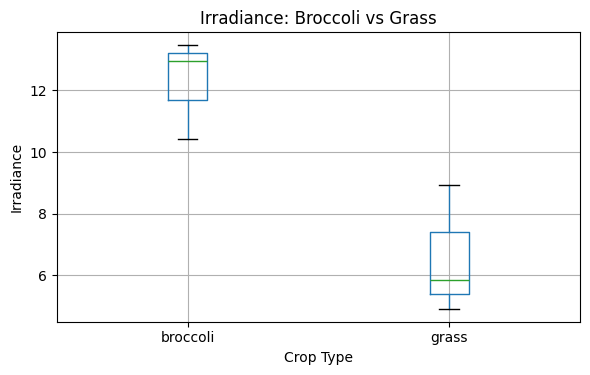

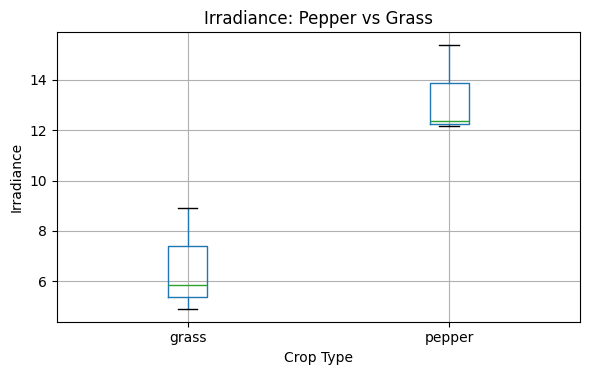

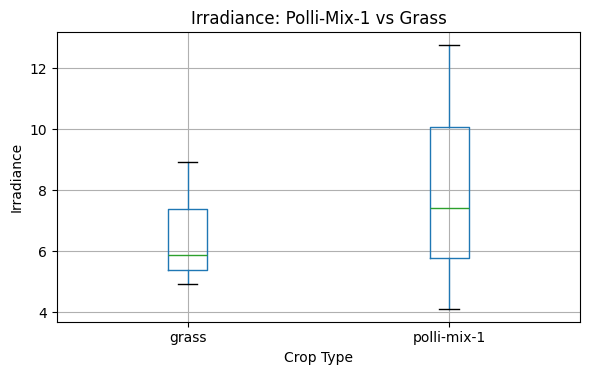

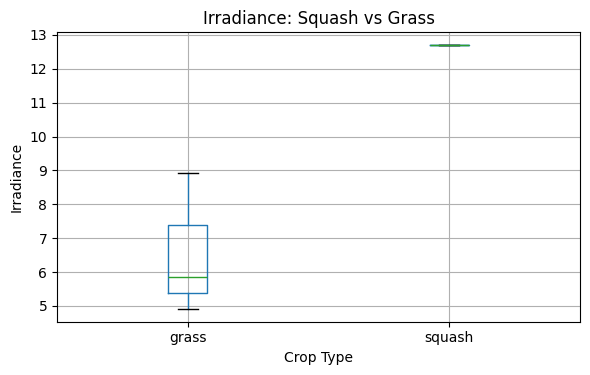

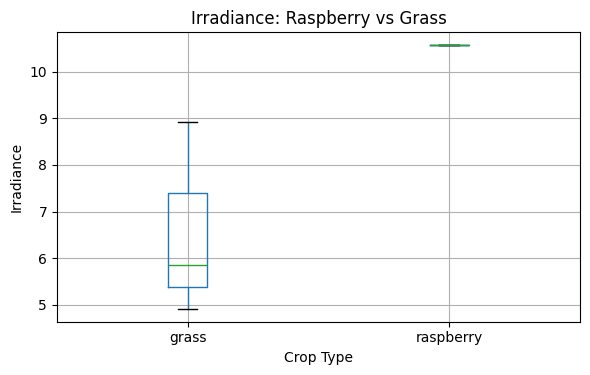

In [2]:
# Irradiance: Each crop vs Grass
for crop in crops:
    fig, ax = plt.subplots(figsize=(6, 4))
    subset = df[df['crop'].isin([crop, 'grass'])]
    subset.boxplot(column='irradiance', by='crop', ax=ax)
    plt.suptitle('')  # Remove auto title
    ax.set_title(f'Irradiance: {crop.title()} vs Grass')
    ax.set_ylabel('Irradiance')
    ax.set_xlabel('Crop Type')
    plt.tight_layout()
    plt.show()

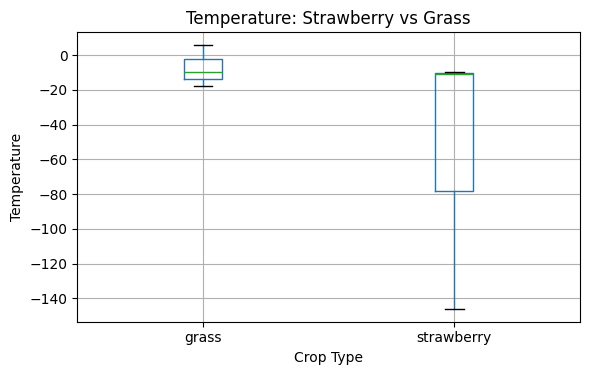

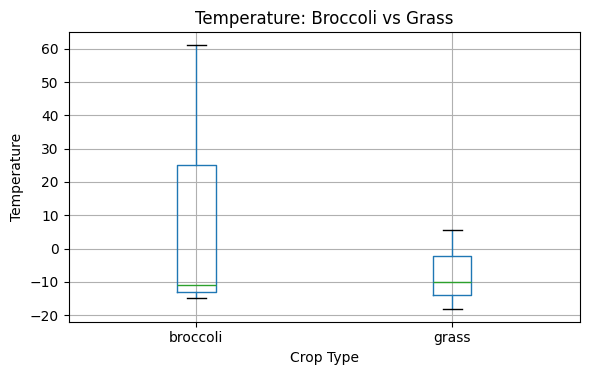

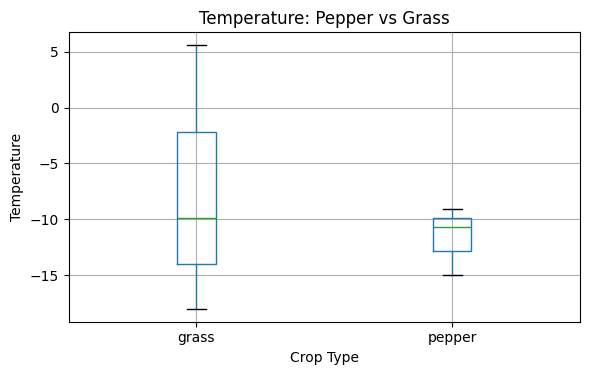

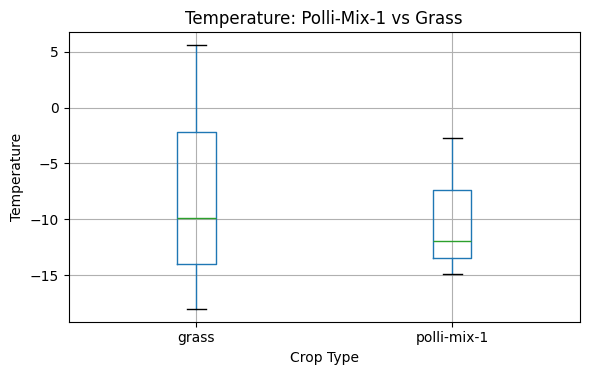

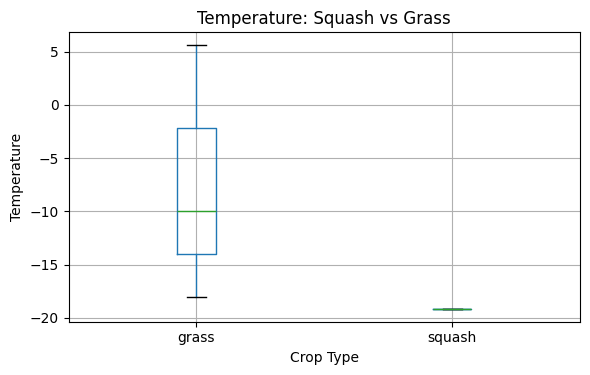

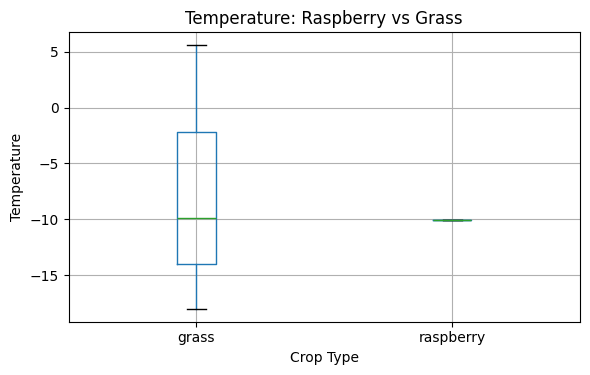

In [3]:
# Temperature: Each crop vs Grass
for crop in crops:
    fig, ax = plt.subplots(figsize=(6, 4))
    subset = df[df['crop'].isin([crop, 'grass'])]
    subset.boxplot(column='temperature', by='crop', ax=ax)
    plt.suptitle('')  # Remove auto title
    ax.set_title(f'Temperature: {crop.title()} vs Grass')
    ax.set_ylabel('Temperature')
    ax.set_xlabel('Crop Type')
    plt.tight_layout()
    plt.show()

In [4]:
from scipy import stats

# t-test: each crop vs grass for irradiance, temperature, humidity
variables = ['irradiance', 'temperature', 'humidity']
results = []

for crop in crops:
    crop_data = df[df['crop'] == crop]
    grass_data = df[df['crop'] == 'grass']
    
    for var in variables:
        stat, pval = stats.ttest_ind(crop_data[var], grass_data[var], nan_policy='omit')
        results.append({
            'Crop': crop,
            'Variable': var,
            't-statistic': round(stat, 4),
            'p-value': round(pval, 4),
            'sig': '*' if pval < 0.05 else ''
        })

results_df = pd.DataFrame(results)
results_df

,Crop,Variable,t-statistic,p-value,sig
0,strawberry,irradiance,1.8247,0.1421,
1,strawberry,temperature,-1.0453,0.3549,
2,strawberry,humidity,-1.2410,0.2824,
3,broccoli,irradiance,3.7372,0.0202,*
4,broccoli,temperature,0.7461,0.4971,
5,broccoli,humidity,-0.1344,0.8996,
6,pepper,irradiance,4.2111,0.0136,*
7,pepper,temperature,-0.5765,0.5952,
8,pepper,humidity,-1.6888,0.1665,
9,polli-mix-1,irradiance,0.5452,0.6146,
